# TODO
1. PairPlots
2. Profiling reports
3. Compare results to preprocessed of UCI

In [41]:
generate_profiling_reports = False

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
# set pandas to show all columns of the df when using the display function
pd.set_option('display.max_columns', None)

# Load the data

In [43]:
# list the datasets that should be used in the current run
datasets = ["hungarian", "cleveland", "switzerland", "long-beach-va"]

In [44]:
# custom function to read the dataset into a csv formated string
# the name is used as a delimiter here because it is the last feature and common among all entrys
def readRawData(filePath:str):
    with open(filePath) as file:
        dataString = file.read()
        dataString = dataString.replace("\n"," ")
        dataString = re.sub("[a-zA-Z]+ ","name\n", dataString)
        dataString = dataString.replace(" ",",")
        return dataString

In [45]:
# read the data from the specified datasets into the df
from io import StringIO
df = pd.DataFrame()
for dataset in datasets:
    dataset_df = pd.read_csv(StringIO(readRawData("./Data/"+ dataset +".data")), header=None, sep=",")
    dataset_df['dataset'] = dataset
    df = pd.concat([df,dataset_df ], ignore_index=True)

In [46]:
df.columns=["id", "ccf", "age", "sex", "painloc", "painexer" , "relrest" , "pncaden" , "cp", "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "name", "dataset"]

In [47]:
# read the data from the specified datasets into the df
from io import StringIO
dfNew = pd.DataFrame()
for dataset in datasets:
    dataset_df = pd.read_csv(StringIO(readRawData("./Data/"+ 'new' +".data")), header=None, sep=",")
    dataset_df['dataset'] = dataset
    dfNew = pd.concat([dfNew,dataset_df ], ignore_index=True)

In [48]:
df = df.replace(-9, float('nan'))

# Analysis on all features including dropped once

In [49]:
if generate_profiling_reports:
    import pandas_profiling
    profile = pandas_profiling.ProfileReport(df, title='Pandas Profiling Report for the complete UCI dataset', explorative=True)
    profile.to_file("Pandas Profiling Report for all features.html")

In [50]:
df.groupby('dataset').describe()

id                                                    \
               count         mean         std     min      25%     50%   
dataset                                                                  
cleveland      282.0   151.517730   87.131234     1.0    75.25   151.5   
hungarian      294.0  1195.853741  397.340367  1001.0  1080.25  1158.5   
long-beach-va  200.0   101.310000   58.717824     1.0    50.75   100.5   
switzerland    123.0  3625.886179  499.271374  3001.0  3031.50  4012.0   

                                  ccf                                     \
                   75%     max  count mean  std  min  25%  50%  75%  max   
dataset                                                                    
cleveland       227.75   298.0  282.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
hungarian      1235.75  5002.0  294.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
long-beach-va   152.25   202.0  200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
switzerland    4042.50  4074.0  123.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                 age                                                     \
               count       mean       std   min   25%   50%   75%   max   
dataset                                                                   
cleveland      282.0  54.411348  9.053083  29.0  48.0  55.0  61.0  77.0   
hungarian      294.0  47.826531  7.811812  28.0  42.0  49.0  54.0  66.0   
long-beach-va  200.0  59.350000  7.811697  35.0  55.0  60.0  64.0  77.0   
switzerland    123.0  55.317073  9.032108  32.0  51.0  56.0  61.5  74.0   

                 sex                                              painloc  \
               count      mean       std  min  25%  50%  75%  max   count   
dataset                                                                     
cleveland      282.0  0.677305  0.468338  0.0  0.0  1.0  1.0  1.0     0.0   
hungarian      294.0  0.724490  0.447533  0.0  0.0  1.0  1.0  1.0   294.0   
long-beach-va  200.0  0.970000  0.171015  0.0  1.0  1.0  1.0  1.0   200.0   
switzerland    123.0  0.918699  0.274414  0.0  1.0  1.0  1.0  1.0   123.0   

                                                           painexer            \
                   mean       std  min  25%  50%  75%  max    count      mean   
dataset                                                                         
cleveland           NaN       NaN  NaN  NaN  NaN  NaN  NaN      0.0       NaN   
hungarian      0.921769  0.268993  0.0  1.0  1.0  1.0  1.0    294.0  0.442177   
long-beach-va  0.925000  0.264052  0.0  1.0  1.0  1.0  1.0    200.0  0.675000   
switzerland    0.910569  0.286532  0.0  1.0  1.0  1.0  1.0    123.0  0.821138   

                                                 relrest                      \
                    std  min  25%  50%  75%  max   count      mean       std   
dataset                                                                        
cleveland           NaN  NaN  NaN  NaN  NaN  NaN     0.0       NaN       NaN   
hungarian      0.497492  0.0  0.0  0.0  1.0  1.0   294.0  0.520408  0.500435   
long-beach-va  0.469550  0.0  0.0  1.0  1.0  1.0   196.0  0.831633  0.375150   
switzerland    0.384804  0.0  1.0  1.0  1.0  1.0   123.0  0.780488  0.415609   

                                       pncaden                               \
               min  25%  50%  75%  max   count mean std min 25% 50% 75% max   
dataset                                                                       
cleveland      NaN  NaN  NaN  NaN  NaN     0.0  NaN NaN NaN NaN NaN NaN NaN   
hungarian      0.0  0.0  1.0  1.0  1.0     0.0  NaN NaN NaN NaN NaN NaN NaN   
long-beach-va  0.0  1.0  1.0  1.0  1.0     0.0  NaN NaN NaN NaN NaN NaN NaN   
switzerland    0.0  1.0  1.0  1.0  1.0     0.0  NaN NaN NaN NaN NaN NaN NaN   

                  cp                                              trestbps  \
               count      mean       std  min  25%  50%  75%  max    count   
dataset                                                      

## Through the high correlation check if dummy is equal to trestbps

In [51]:
print(df[df['dummy'] == df['trestbps']].shape)

(840, 77)


It is assumed that these two variables are representing the same value. Dummy is therefor removed.

# Drop columns

In [52]:
irrelevant_columns = [
    "id", # A id is not relevant for a model
    "ccf", # the social security number does not influence if you have a heart disease or not
    "pncaden", # sum of painlox painexer relrest -> the features are already in the dataset -> drop because it is a duplicate
    "ekgmo", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "ekgday", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "ekgyr", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "cmo", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "cday", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "cyr", # The date of the medical examination is irrelevant for the occurrence of a disease.
    "name", # Constant

]
df.drop(irrelevant_columns, inplace=True, axis=1)

In [53]:
unexplained_columns = [
    "restckm", # irrelevant according to the uci
    "exerckm", # irrelevant according to the uci
    "thalsev", # irrelevant according to the uci
    "thalpul", # irrelevant according to the uci
    "earlobe", # Constant
    "lvx1", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvx2", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvx3", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvx4", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "lvf", # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    'junk', # it is not possible to gain information about what this feature measures -> could not be supplied to trained models -> drop https://archive.ics.uci.edu/ml/datasets/Heart+Disease
    "dummy" # same as trestbps
]
df.drop(unexplained_columns, inplace=True, axis=1)

# false predictors

In [54]:
from sklearn.model_selection import train_test_split
X = df.loc[ : , (df.columns != 'num')&(df.columns != 'dataset')]
y = df.loc[: , (df.columns== 'num')].values.ravel().copy()
y[y> 1] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method="hist", eval_metric= "auc", enable_categorical=True)
xgb.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-auc:0.99054	validation_1-auc:0.99200
[1]	validation_0-auc:0.99054	validation_1-auc:0.99200
[2]	validation_0-auc:0.99727	validation_1-auc:1.00000
[3]	validation_0-auc:0.99885	validation_1-auc:1.00000
[4]	validation_0-auc:0.99885	validation_1-auc:1.00000
[5]	validation_0-auc:0.99988	validation_1-auc:1.00000
[6]	validation_0-auc:0.99988	validation_1-auc:1.00000
[7]	validation_0-auc:0.99997	validation_1-auc:1.00000
[8]	validation_0-auc:0.99997	validation_1-auc:1.00000
[9]	validation_0-auc:0.99998	validation_1-auc:1.00000
[10]	validation_0-auc:0.99998	validation_1-auc:1.00000
[11]	validation_0-auc:0.99998	validation_1-auc:1.00000
[12]	validation_0-auc:0.99998	validation_1-auc:1.00000
[13]	validation_0-auc:0.99998	validation_1-auc:1.00000
[14]	validation_0-auc:0.99998	validation_1-auc:1.00000
[15]	validation_0-auc:0.99999	validation_1-auc:1.00000
[16]	validation_0-auc:1.00000	validation_1-auc:1.00000
[17]	validation_0-auc:1.00000	validation_1-auc:1.00000
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
results = xgb.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = np.arange(0, 1.001,0.01)

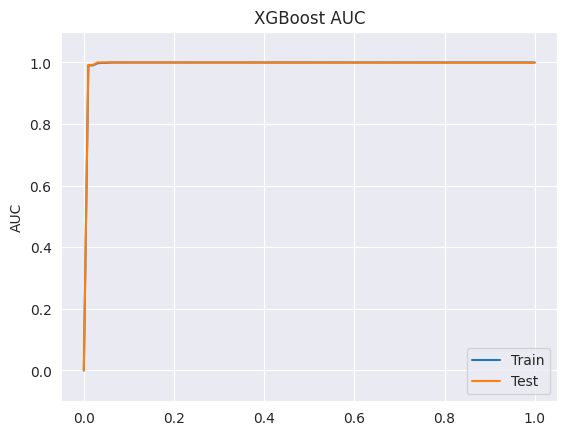

In [57]:
fig, ax = plt.subplots()
ax.plot(x_axis, [0]+results['validation_0']['auc'], label='Train')
ax.plot(x_axis, [0]+results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.ylim(-0.1, 1.1)
plt.savefig('XGBoost AUC.pdf', bbox_inches='tight')
plt.show()

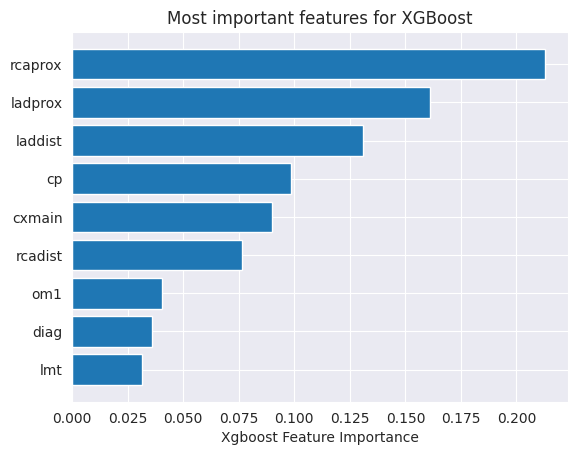

In [58]:
sorted_idx = xgb.feature_importances_.argsort()

plt.barh(X.columns[sorted_idx][-9:], xgb.feature_importances_[sorted_idx][-9:])
plt.xlabel("Xgboost Feature Importance")
plt.title('Most important features for XGBoost')
plt.savefig('Xgboost Feature Importance.pdf', bbox_inches='tight')

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, xgb.predict(X_test))

0.987

In [60]:
hidden_identifier = [
    'lmt',      # Left main truck
    'ladprox',  # Proximal left anterior descending artery
    'laddist',  # Distal left anterior descending artery
    'diag',     # Diagonal branches
    'cxmain',   # Circumflex
    'ramus',    # Ramus intermedius
    'om1',      # First obtuse marginal branch
    'om2',      # Second obtuse marginal branch
    'rcaprox',  # Proximal right coronary artery
    'rcadist',  # Distal right coronary artery
]
df.drop(hidden_identifier, inplace=True, axis=1)

In [61]:
X = df.loc[ : , (df.columns != 'num')&(df.columns != 'dataset')]
y = df.loc[: , (df.columns== 'num')].values.ravel().copy()
y[y> 1] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method="hist", eval_metric= "auc", enable_categorical=True)
xgb.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-auc:0.93870	validation_1-auc:0.86724
[1]	validation_0-auc:0.96094	validation_1-auc:0.88544
[2]	validation_0-auc:0.97440	validation_1-auc:0.88016
[3]	validation_0-auc:0.98273	validation_1-auc:0.87912
[4]	validation_0-auc:0.99043	validation_1-auc:0.88640
[5]	validation_0-auc:0.99166	validation_1-auc:0.89000
[6]	validation_0-auc:0.99411	validation_1-auc:0.89160
[7]	validation_0-auc:0.99575	validation_1-auc:0.88976
[8]	validation_0-auc:0.99715	validation_1-auc:0.89180
[9]	validation_0-auc:0.99786	validation_1-auc:0.89836
[10]	validation_0-auc:0.99835	validation_1-auc:0.89724
[11]	validation_0-auc:0.99880	validation_1-auc:0.89996
[12]	validation_0-auc:0.99930	validation_1-auc:0.89956
[13]	validation_0-auc:0.99957	validation_1-auc:0.90088
[14]	validation_0-auc:0.99974	validation_1-auc:0.89936
[15]	validation_0-auc:0.99969	validation_1-auc:0.90080
[16]	validation_0-auc:0.99987	validation_1-auc:0.90168
[17]	validation_0-auc:0.99989	validation_1-auc:0.89904
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [63]:
results = xgb.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = np.arange(0, 1.001,0.01)

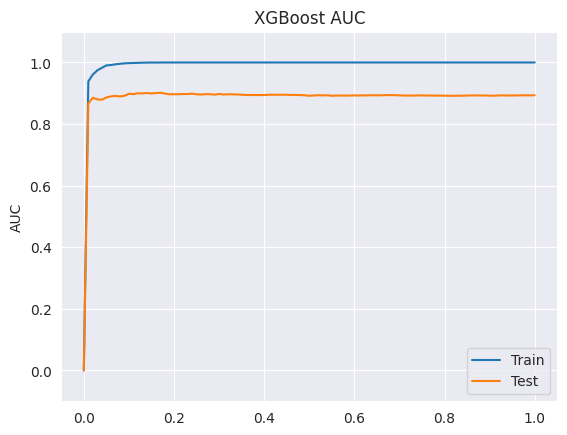

In [64]:
fig, ax = plt.subplots()
ax.plot(x_axis, [0]+results['validation_0']['auc'], label='Train')
ax.plot(x_axis, [0]+results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.ylim(-0.1, 1.1)
plt.savefig('XGBoost AUC.pdf', bbox_inches='tight')
plt.show()

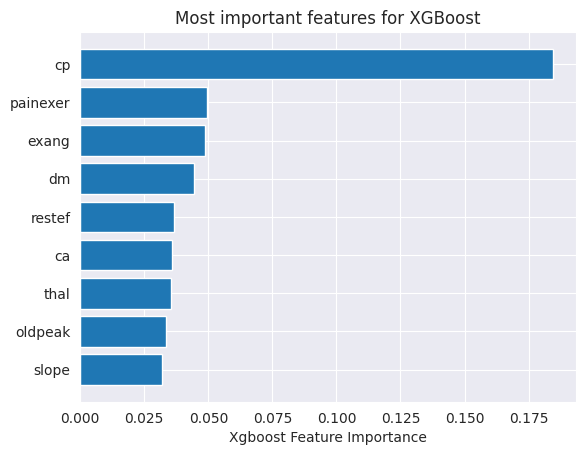

In [65]:
sorted_idx = xgb.feature_importances_.argsort()

plt.barh(X.columns[sorted_idx][-9:], xgb.feature_importances_[sorted_idx][-9:])
plt.xlabel("Xgboost Feature Importance")
plt.title('Most important features for XGBoost')
plt.savefig('Xgboost Feature Importance.pdf', bbox_inches='tight')

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, xgb.predict(X_test))

0.829

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.87      0.81      0.84       125

    accuracy                           0.83       225
   macro avg       0.83      0.83      0.83       225
weighted avg       0.83      0.83      0.83       225



ValueError: [(0.1411764705882353, 0.1411764705882353, 0.1411764705882353), (0.28627450980392155, 0.28627450980392155, 0.28627450980392155), (0.42745098039215684, 0.42745098039215684, 0.42745098039215684), (0.5725490196078431, 0.5725490196078431, 0.5725490196078431), (0.7137254901960784, 0.7137254901960784, 0.7137254901960784), (0.8588235294117647, 0.8588235294117647, 0.8588235294117647)] is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

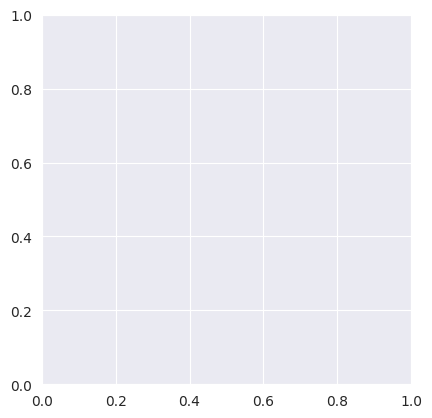

In [73]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, xgb.predict(X_test)), display_labels = [False, True])

cm_display.plot(cmap=sns.color_palette('binary_r'))
plt.show()

In [ ]:
if generate_profiling_reports:
    profile = pandas_profiling.ProfileReport(df, title='Pandas Profiling Report for the used features from the UCI dataset', explorative=True)
    profile.to_file("Pandas Profiling Report for all used features.html")

# Start of analysis
## Static Analysis
### Get the number of entries where the ST Depression was measured at a timepoint that is higher than the Exercise electrocardiogram

In [ ]:
df[df['thaltime'] > df['thaldur']].shape

### Check heart rate for inconsistency

In [ ]:
df.loc[df['thalach'] < df['thalrest'],['thalach','thalrest']]

The resting heart rate (thalrest) can not be lower than the maximum archived heart rate (thalach) because the thalach seems unrealisitc it is set to NaN

## enrich smoke

In [ ]:

def enrich_smoke(input_df):
        # we do not enrich smoke if cigs and years are conflicting

        # set all values of smoke that are NaN to 0 if the value of years is 0 and smoke does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] == 0) & ~(input_df['cigs'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of years is larger than 0 and smoke does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] > 0) & (input_df['cigs'] != 0),'smoke'] = 1

        # set all values of smoke that are NaN to 0 if the value of smoke is 0 and years does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] == 0) & ~(input_df['years'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of cigs is larger than 0 and years does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] > 0) & (input_df['years'] != 0),'smoke'] = 1
        return input_df
percentage_missing_pre = ((df["smoke"].isna().sum() / len(df) * 100).round(2))


df = enrich_smoke(df)

percentage_missing_post = ((df["smoke"].isna().sum() / len(df) * 100).round(2))
print(f"missing before enrichment:\t {percentage_missing_pre}%")
print(f"missing after enrichment:\t {percentage_missing_post}%")

The columns used for the enrichment are kept in the df because they provide a more detailed description of the smoking behaviour

## Explore how many NaNs and zeros are within one column for each attribute.

In [ ]:
(df.loc[:, df.columns != 'dataset'].eq(0)).join(df['dataset']).groupby("dataset").sum()

In [ ]:
(df.loc[:, df.columns != 'dataset'].eq(-9)).join(df['dataset']).groupby("dataset").sum()

## outliers

In [ ]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

df_continous = df[["age","trestbps","thaldur","thalach","thalrest","tpeakbps","tpeakbpd","trestbpd","oldpeak"]]

sc = StandardScaler()
temp = sc.fit_transform(df_continous)
df_continous = pd.DataFrame(temp, columns = ["age","trestbps","thaldur","thalach","thalrest","tpeakbps","tpeakbpd","trestbpd","oldpeak"])
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_continous))
ax.set(xlabel='', ylabel='normalized value')
plt.title("data distribution of numerical features")
plt.show()

df_continous = df[["age","trestbps","thaldur","thalach","thalrest","tpeakbps","tpeakbpd","trestbpd","oldpeak"]]

sns.boxplot(x="variable", y="value", data=pd.melt(df_continous))
plt.title("original values")
sns.set(rc={"figure.figsize":(12, 3)})
plt.show()




## Correlation

In [ ]:
percentage_missing = ((df.isna().sum()/len(df)*100).round(2)).to_dict()
test = {}
for percentage in np.arange(0,100,1):
    missing_vlaues = {key: val for key, val in percentage_missing.items() if val > percentage}
    test[percentage] = df.drop([*missing_vlaues.keys()], axis=1).shape + (df.drop([*missing_vlaues.keys()], axis=1).isna().sum().sum(), )

In [ ]:
plt.figure(figsize=(15,15))
# Compute the correlation matrix
corr = df.corr()
corr = corr.round(2)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=.5, vmin=-1, vmax=1)
plt.show()

In [ ]:
for dataset in datasets:
    plt.figure(figsize=(15, 15))
    # Compute the correlation matrix
    corr = df[df['dataset'] == dataset].corr()
    corr = corr.round(2)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap="coolwarm", center=0, square=True, linewidths=.5, vmin=-1, vmax=1)
    plt.show()


In [ ]:
df_corr = df.copy()
df_corr = pd.concat([df_corr,pd.get_dummies(df_corr['cp'], prefix='cp')],axis=1)
df_corr.drop(['cp'],axis=1, inplace=True)

percentage_missing = ((df_corr.isna().sum()/len(df_corr)*100).round(2)).to_dict()

In [ ]:
unstacked_corr = df_corr.corr().unstack()
#remove duplicate pairs
#index = pd.MultiIndex.from_tuples(tuples)
unstacked_corr = unstacked_corr.reset_index()
unstacked_corr.columns = ["feature1","feature2","correlation"]
#remove duplicates and correlation between the same feature
unstacked_corr = unstacked_corr[unstacked_corr['feature1'] < unstacked_corr['feature2']]
unstacked_corr['NaN_Values_feature1'] = [percentage_missing[x] for x in unstacked_corr['feature1']]
unstacked_corr['NaN_Values_feature2'] = [percentage_missing[x] for x in unstacked_corr['feature2']]
unstacked_corr['abs_corr'] = abs(unstacked_corr['correlation'])
unstacked_corr = unstacked_corr[(abs(unstacked_corr["correlation"]) > 0.5) & (unstacked_corr['NaN_Values_feature1'] < 75) & (unstacked_corr['NaN_Values_feature2'] < 75)].sort_values(by="abs_corr", ascending=False)
unstacked_corr.drop(["abs_corr"], inplace=True, axis=1)
print(unstacked_corr)

In [ ]:
cp_4VSpainexer = pd.crosstab(df_corr['cp_4'], df_corr['painexer'], rownames=['cp_4'], colnames=['painexer'])
cpVSpainexer = pd.crosstab(df['cp'], df['painexer'], rownames=['cp_4'], colnames=['painexer'])
print(cp_4VSpainexer)
print("------------------------------------")
print(cpVSpainexer)

## PairPlots

# minimumPercentageToBeDropped

In [ ]:
print_pair_plots = False #was missing
if print_pair_plots:
    sns.pairplot(df, hue="num", palette="tab10")
if print_pair_plots:
    sns.pairplot(df, hue="dataset", palette="tab10")

In [ ]:
test = pd.DataFrame.from_dict(test).transpose()
test.columns = ["rows", "columns", "number of imputed cells"]

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1)
ax.grid()
#add decided thresholds
thresholds = [0,4,8,20,35,60,75,100]
for threshold in thresholds:
    ax.vlines(threshold,0,80000,color="#ef9494")

lns1 = ax.plot(test.index, test["number of imputed cells"], '-o', label = 'number of imputed cells', color = 'orange')
ax2 = ax.twinx()
lns2 = ax2.plot(test.index, test["columns"], '-o', label = 'n features')

ax.set_xlabel('minimumPercentageMissingToBeDropped')
ax.set_ylabel('number of imputed cells')
ax2.set_ylabel('n features')


# added these three lines
lns = lns1 + lns2
labs = [l.get_label() for l in lns]

handles, labels = ax.get_legend_handles_labels()
lns.append(Line2D([0],[0],markersize=10,color='#ef9494',label='thresholds'))
labs.append("Color Patch")

legend = ax.legend(lns, labs, loc=2, bbox_to_anchor=(0,1))

plt.show()

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1)
ax.grid()
lns1 = ax.plot(test.index, test["number of imputed cells"], '-o', label = 'number of imputed cells', color = 'orange')
ax2 = ax.twinx()
lns2 = ax2.plot(test.index, test["columns"], '-o', label = 'n features')

ax.set_xlabel('minimumPercentageMissingToBeDropped')
ax.set_ylabel('number of imputed cells')
ax2.set_ylabel('n features')


# added these three lines
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
legend = ax.legend(lns, labs, loc=2, bbox_to_anchor=(0,1))

plt.show()

In [ ]:
percentage_missing = ((df.isna().sum() / len(df) * 100).round(2)).to_dict()
test = {}
for percentage in np.arange(0, 100, 10):
    missing_vlaues = {key: val for key, val in percentage_missing.items() if val > percentage}
    test[percentage] = df.drop([*missing_vlaues.keys()], axis=1).dropna(axis=0, how='any').shape
test = pd.DataFrame.from_dict(test).transpose()
test.columns = ["rows", "columns"]

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1 = sns.lineplot(data=test, y="columns", x=test.index, ax=ax1, color="orange", marker='o')
ax2 = sns.lineplot(data=test, y="rows", x=test.index, ax=ax2, color="blue", marker='o')
ax1.set_ylabel('n features')
ax1.set_xlabel('minimumPercentageMissingToBeDropped')
ax2.set_ylabel('n datapoints')
ax1.figure.legend(['features','datapoints'], bbox_to_anchor=(1.,1),loc=1, bbox_transform=ax1.transAxes)
plt.show()

# Model visualisation

In [ ]:
class DataframeSmokeTransformer:
    def transform(self, input_df, **transform_params):
        # we do not enrich smoke if cigs and years are conflicting

        # set all values of smoke that are NaN to 0 if the value of years is 0 and smoke does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] == 0) & ~(input_df['cigs'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of years is larger than 0 and smoke does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['years'] > 0) & (input_df['cigs'] != 0),'smoke'] = 1

        # set all values of smoke that are NaN to 0 if the value of smoke is 0 and years does not indicate that the person smokes
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] == 0) & ~(input_df['years'] > 0),'smoke'] = 0
        # set all values of smoke that are NaN to 1 if the value of cigs is larger than 0 and years does not indicate that the person does not smoke
        input_df.loc[(input_df['smoke'].isna()) & (input_df['cigs'] > 0) & (input_df['years'] != 0),'smoke'] = 1
        return input_df
    def fit(self, X, y=None, **fit_params):
        # there is nothing to be fitted here because this handling is not split specific
        return self

In [ ]:
class EnrichHeartData:
    def transform(self, input_df, **transform_params):
        input_df["heart_rate_diff"] = input_df['thalach'] - input_df['thalrest']
        input_df["rldv5_diff"] = input_df['rldv5'] - input_df['rldv5e']
        return input_df

    def fit(self, X, y=None, **fit_params):
        return self

In [ ]:
from sklearn.exceptions import NotFittedError


class DropColumnsBasedOnMinimumPercentageToBeDropped:
    def __init__(self):
        self.minimum_percentage_to_be_dropped = 100
        self.fitted = False
        self.valuesToKeep = []

    def set_params(self, **params):
        self.minimum_percentage_to_be_dropped = params.get('minimum_percentage_to_be_dropped')

    def transform(self, input_df, **transform_params):
        if self.fitted:
            return input_df[input_df.columns.intersection(self.valuesToKeep)]
        else:
            raise NotFittedError()

    def fit(self, X, y=None, **fit_params):
        # calculate percentage of missing values for each column and store in a dictionary
        percentage_missing = (X.isna().sum()/len(df)*100).to_dict()
        # generate list of columns to keep
        self.valuesToKeep = [key for key, val in percentage_missing.items() if val <= self.minimum_percentage_to_be_dropped]
        self.fitted = True
        return self

In [ ]:
class FixCommonEncodingErrors:
    def transform(self, input_df, **transform_params):
        input_df = input_df.copy(deep=True)
        # if cholesterin is 0 it was not measured
        input_df.loc[input_df['chol'] == 0,'chol'] =  np.float64("NaN")
        # leave the dead ones behind
        # drop entries with a blood pressure of 0
        input_df.loc[input_df['trestbps'] == 0,'trestbps'] =  np.float64("NaN")
        # is a binary variable (wrong measurement was detected in Pandas Profiling Report)
        input_df.loc[df['prop'].isin([0,1]) == False,'prop' ] = np.float64("NaN")
        # is a variable that has the values 0-3 by definition  (wrong measurement was detected in Pandas Profiling Report)
        input_df.loc[input_df['ca'] >3 ,'ca'] =  np.float64("NaN")
        # transform proto according to possible values from data/ask-detrano
        input_df.loc[input_df['proto'] == 200,'proto'] =  9
        input_df.loc[input_df['proto'] == 175,'proto'] =  8
        input_df.loc[input_df['proto'] == 150,'proto'] =  7
        input_df.loc[input_df['proto'] == 130,'proto'] =  6
        input_df.loc[input_df['proto'] == 125,'proto'] =  5
        input_df.loc[input_df['proto'] == 100,'proto'] = 4
        input_df.loc[input_df['proto'] == 75,'proto'] = 3
        input_df.loc[input_df['proto'] == 50,'proto'] = 2
        input_df.loc[input_df['proto'] == 25,'proto'] = 1
        #set all other values to NaN
        input_df.loc[input_df['proto'].isin([*range(1,13)]) == False, 'proto'] = np.float64("NaN")
        # the timepoint when the measurement was taken can not be larger than the time that the exercise took.
        input_df.loc[df['thaltime'] > df['thaldur'], 'thaltime'] = np.float64('NaN')
        # maximum archived heart rate can not  be lower than the heart rate at rest
        input_df.loc[input_df['thalach'] < input_df['thalrest'],'thalach'] = np.float64('NaN')

        return input_df
    def fit(self, X, y=None, **fit_params):
        return self

In [ ]:
df.loc[df["num"]>1,'num'] = 1

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
one_hot_encoded_features = ['cp','restecg', 'slope','ca', 'restwm']
X = df.loc[:,(df.columns!= 'num') & (df.columns != 'dataset') ].copy(deep=True)
y = df.loc[: , (df.columns== 'num')].values.ravel().copy()
oneHotEncoder = ColumnTransformer(
    transformers=[
        ('discretize', KBinsDiscretizer(strategy='ordinal'), ['age']),
        ('oneHotEncoder', OneHotEncoder(handle_unknown='ignore'), lambda X : [value for value in one_hot_encoded_features if value in X.columns]),
    ], remainder='passthrough')
pipeline = Pipeline(steps=[
    ('fix_encoding_errors', FixCommonEncodingErrors()),
    ('transform_smoke', DataframeSmokeTransformer()),
    ('enrich_heart_rate', EnrichHeartData()),
    ('drop_columns', DropColumnsBasedOnMinimumPercentageToBeDropped()),
    ('oneHotEncoder', oneHotEncoder),
    ('impute', SimpleImputer()),
    ('scaler', 'passthrough'),
    ('sampler', 'passthrough'),
    ('estimator', DecisionTreeClassifier())
])
parameters = {
    'drop_columns__minimum_percentage_to_be_dropped' : 0,
    'estimator__criterion': "gini",
    'estimator__max_depth': None,
    'estimator__min_samples_split': 2,
    'impute__strategy':'mean',
    'oneHotEncoder__discretize': KBinsDiscretizer(2,encode='ordinal', strategy='uniform')
}
pipeline.set_params(**parameters)
pipeline.fit(X,y)

In [ ]:
decision_tree = pipeline['estimator']

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree)


In [ ]:
X = df.loc[:,(df.columns!= 'num') & (df.columns != 'dataset') ].copy(deep=True)
y = df.loc[: , (df.columns== 'num')].values.ravel().copy()
X_transformed = X.copy(deep=True)
X_transformed = FixCommonEncodingErrors().transform(X_transformed)
X_transformed = DataframeSmokeTransformer().transform(X_transformed)
X_transformed = EnrichHeartData().transform(X_transformed)
columnDropper = DropColumnsBasedOnMinimumPercentageToBeDropped()
columnDropper.set_params(**{'minimum_percentage_to_be_dropped':0})
columnDropper.fit(X)
X_transformed = columnDropper.transform(X_transformed)
# discretizer =  KBinsDiscretizer(2,encode='ordinal', strategy='uniform')
# X_transformed['age'] = discretizer.fit_transform(X_transformed['age'].to_numpy().reshape(-1, 1))
# oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
# one_hot_encoded_features = [value for value in one_hot_encoded_features if value in X_transformed.columns]
# encoded = pd.DataFrame(oneHotEncoder.fit_transform(X_transformed[one_hot_encoded_features]).toarray(), columns=oneHotEncoder.get_feature_names(one_hot_encoded_features))
# X_transformed = X_transformed.drop(columns=one_hot_encoded_features)
# X_transformed = X_transformed.join(encoded)
# imputer = SimpleImputer(strategy='mean')
# X_transformed = pd.DataFrame(imputer.fit_transform(X_transformed), columns=imputer.get_feature_names_out())
# scaler = MaxAbsScaler()
# X_transformed = pd.DataFrame(scaler.fit_transform(X_transformed), columns=scaler.get_feature_names_out())
# sampler = RandomUnderSampler(random_state=42)
# X_transformed, y = sampler.fit_resample(X_transformed,y)
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
decisionTreeClassifier = decisionTreeClassifier.fit(X_transformed,y)

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(decisionTreeClassifier, X_transformed, y,
               target_name="heart disease",
               feature_names=X_transformed.columns,
               class_names=['No','Yes']
               )
viz

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(decisionTreeClassifier, X_transformed, y,
               target_name="heart disease",
               feature_names=X_transformed.columns,
               class_names=['No','Yes']
               )

viz


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = df.loc[:,(df.columns!= 'num') & (df.columns != 'dataset') ].copy(deep=True)
y = df.loc[: , (df.columns== 'num')].values.ravel().copy()
X_transformed = X.copy(deep=True)
X_transformed = FixCommonEncodingErrors().transform(X_transformed)
X_transformed = DataframeSmokeTransformer().transform(X_transformed)
X_transformed = EnrichHeartData().transform(X_transformed)
columnDropper = DropColumnsBasedOnMinimumPercentageToBeDropped()
columnDropper.set_params(**{'minimum_percentage_to_be_dropped':0})
columnDropper.fit(X)
X_transformed = columnDropper.transform(X_transformed)
discretizer =  KBinsDiscretizer(2,encode='ordinal', strategy='uniform')
X_transformed['age'] = discretizer.fit_transform(X_transformed['age'].to_numpy().reshape(-1, 1))
# oneHotEncoder = OneHotEncoder(handle_unknown='ignore')
# one_hot_encoded_features = [value for value in one_hot_encoded_features if value in X_transformed.columns]
# encoded = pd.DataFrame(oneHotEncoder.fit_transform(X_transformed[one_hot_encoded_features]).toarray(), columns=oneHotEncoder.get_feature_names(one_hot_encoded_features))
# X_transformed = X_transformed.drop(columns=one_hot_encoded_features)
# X_transformed = X_transformed.join(encoded)
imputer = SimpleImputer(strategy='mean')
X_transformed = pd.DataFrame(imputer.fit_transform(X_transformed), columns=imputer.get_feature_names_out())
# scaler = MaxAbsScaler()
# X_transformed = pd.DataFrame(scaler.fit_transform(X_transformed), columns=scaler.get_feature_names_out())
# sampler = RandomUnderSampler(random_state=42)
# X_transformed, y = sampler.fit_resample(X_transformed,y)
kNeighborsClassifier = KNeighborsClassifier(n_neighbors=82,p=1, weights='distance')
kNeighborsClassifier = kNeighborsClassifier.fit(X_transformed,y)

In [ ]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
target = df.loc[: , (df.columns== 'num')].values.ravel().copy()
# generate data
n = 200
x = X_transformed['age']
y = X_transformed['cp']
z = X_transformed['sex']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette('rainbow').as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=target, marker='o', cmap=cmap, alpha=0.3)
ax.set_xlabel('age')
ax.set_ylabel('cp')
ax.set_zlabel('sex')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


#give the labels to each point
for x_label, y_label, z_label in zip(x, y, z):
    label = X_transformed[X_transformed['age'] == x & X_transformed['cp'] == y & X_transformed['sex'] == z]
    ax3d.text(x, y, z, label)
# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [ ]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
target = df.loc[: , (df.columns== 'num')].values.ravel().copy()
# generate data
x = X_transformed['age']
y = X_transformed['cp']
z = X_transformed['sex']

# axes instance
ax3d = plt.figure(figsize=(6,6)).gca(projection='3d')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette('rainbow').as_hex())

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# plot
ax3d.scatter(x, y, z, s=40, c=target, marker='o', cmap=cmap, alpha=0.3)
ax3d.set_xlabel('age')
ax3d.set_ylabel('cp')
ax3d.set_zlabel('sex')


X_transformed['num'] = target

for index, row in X_transformed.groupby(['sex', 'cp','age']).count().reset_index().iterrows():
    ax3d.text(row['age'], row['cp'], row['sex'], int(row['num']))

plt.show()

In [ ]:
X['age'].describe()

In [ ]:
for current_x, current_y, current_z in zip(x, y, z):
    print(current_x, current_y, current_z)